In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
data = pd.read_csv(r"C:\Users\hp\Downloads\Electric Vehicle Sales by State in India.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Year               96845 non-null  int64 
 1   Month_Name         96845 non-null  object
 2   Date               96845 non-null  object
 3   State              96845 non-null  object
 4   Vehicle_Class      96845 non-null  object
 5   Vehicle_Category   96845 non-null  object
 6   Vehicle_Type       96845 non-null  object
 7   EV_Sales_Quantity  96845 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 5.9+ MB


In [4]:
data.isnull().sum()


Year                 0
Month_Name           0
Date                 0
State                0
Vehicle_Class        0
Vehicle_Category     0
Vehicle_Type         0
EV_Sales_Quantity    0
dtype: int64

In [5]:
data.duplicated().sum()

0

In [6]:
data.head()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014,jan,01-01-2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0
1,2014,jan,01-01-2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0
2,2014,jan,01-01-2014,Andhra Pradesh,AMBULANCE,Others,Others,0
3,2014,jan,01-01-2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0
4,2014,jan,01-01-2014,Andhra Pradesh,BUS,Bus,Bus,0


In [7]:
data.shape

(96845, 8)

In [8]:
data['Date'] = pd.to_datetime(data['Date'],errors = 'coerce')
data['State'] = data['State'].str.strip()
data['Vehicle_Category'] = data['Vehicle_Category'].str.strip()
data['Vehicle_Type'] = data['Vehicle_Type'].str.strip()
data['EV_Sales_Quantity'] = pd.to_numeric(data['EV_Sales_Quantity'],errors = 'coerce')


In [9]:
print(data.columns)

Index(['Year', 'Month_Name', 'Date', 'State', 'Vehicle_Class',
       'Vehicle_Category', 'Vehicle_Type', 'EV_Sales_Quantity'],
      dtype='object')


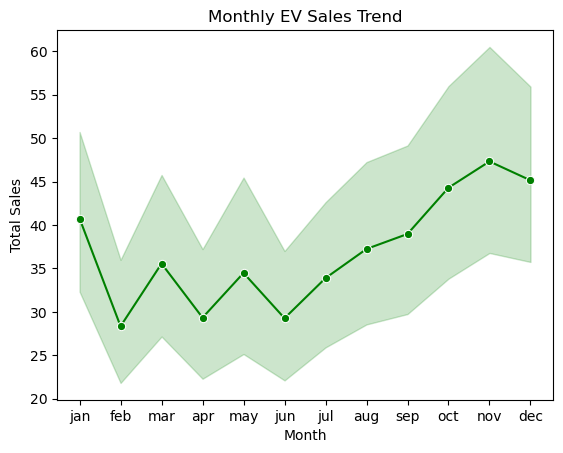

<Figure size 600x400 with 0 Axes>

In [10]:
sns.lineplot(x='Month_Name', y='EV_Sales_Quantity', data=data,marker='o', color='g')
plt.title("Monthly EV Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.figure(figsize=(6,4))
plt.show()

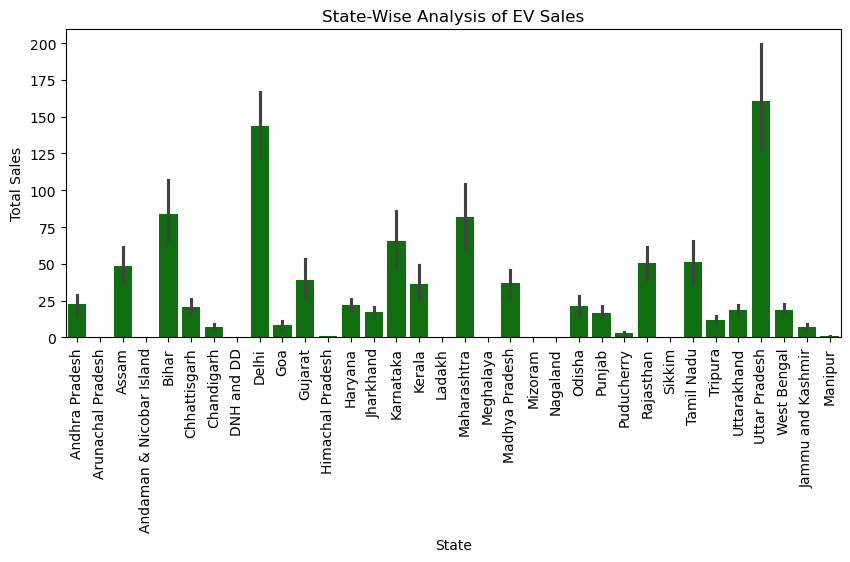

In [11]:
plt.figure(figsize=(10,4))
sns.barplot(x='State', y='EV_Sales_Quantity', data=data, color='g')
plt.title("State-Wise Analysis of EV Sales")
plt.xlabel("State")
plt.ylabel("Total Sales")
plt.xticks(rotation=90)
plt.show()

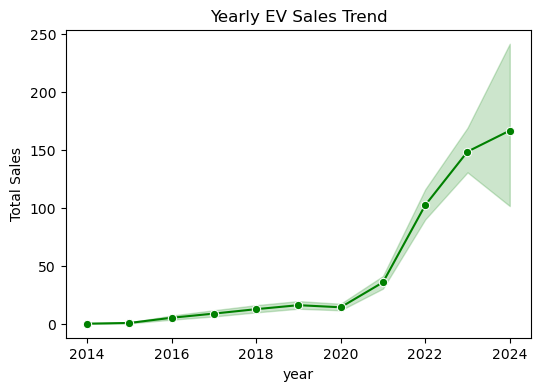

In [12]:
plt.figure(figsize=(6,4))
sns.lineplot(x='Year', y='EV_Sales_Quantity', data=data,marker='o', color='g')
plt.title("Yearly EV Sales Trend")
plt.xlabel("year")
plt.ylabel("Total Sales")
plt.show()

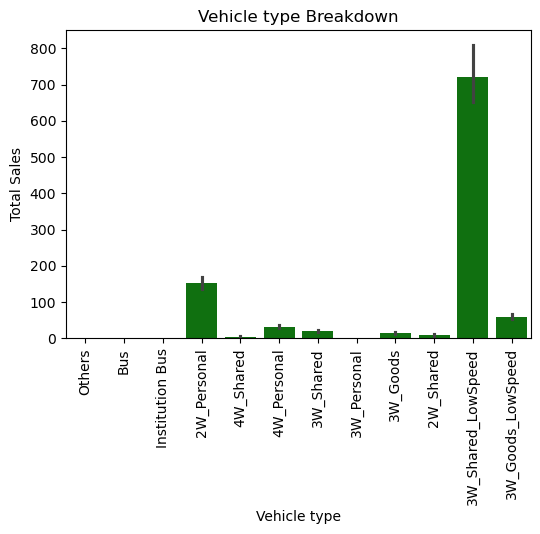

In [13]:
plt.figure(figsize=(6,4))
sns.barplot(x='Vehicle_Type', y='EV_Sales_Quantity', data=data, color='g')
plt.title("Vehicle type Breakdown")
plt.xlabel("Vehicle type")
plt.ylabel("Total Sales")
plt.xticks(rotation=90)
plt.show()

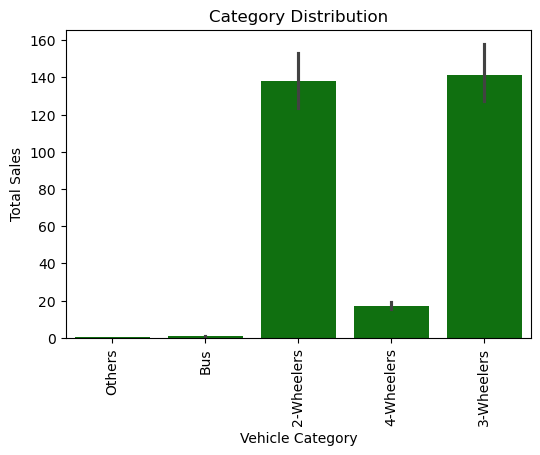

In [14]:
plt.figure(figsize=(6,4))
sns.barplot(x='Vehicle_Category', y='EV_Sales_Quantity', data=data, color='g')
plt.title("Category Distribution")
plt.xlabel("Vehicle Category")
plt.ylabel("Total Sales")
plt.xticks(rotation=90)
plt.show()

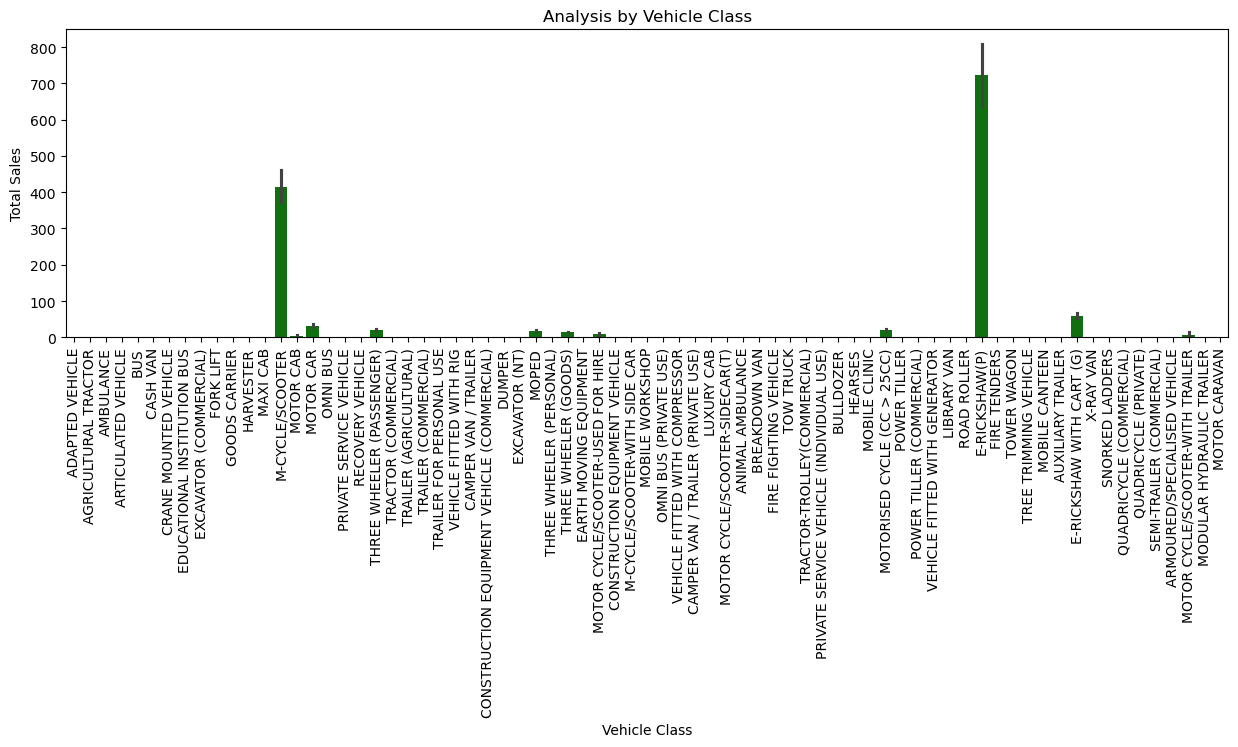

<Figure size 600x400 with 0 Axes>

In [15]:
plt.figure(figsize=(15,4))
sns.barplot(x='Vehicle_Class', y='EV_Sales_Quantity', data=data, color='g')
plt.title("Analysis by Vehicle Class")
plt.xlabel("Vehicle Class")
plt.ylabel("Total Sales")
plt.xticks(rotation=90)
plt.figure(figsize=(6,4))
plt.show()

In [16]:
monthly_trend = data.groupby('Date')['EV_Sales_Quantity'].sum()

C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


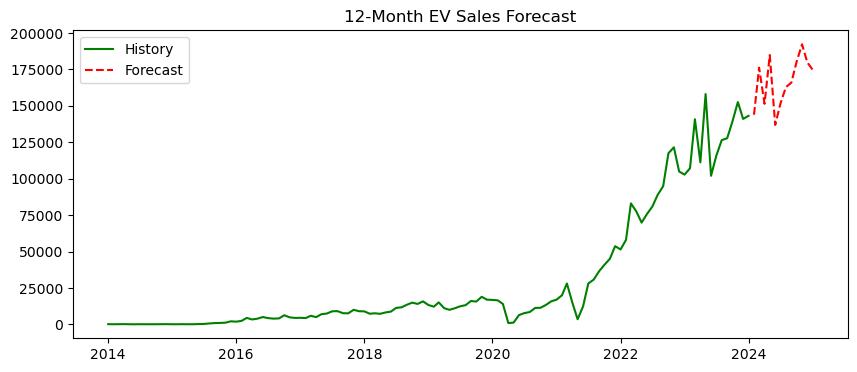

In [17]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
train = monthly_trend
model = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=12)
fit = model.fit()
forecast = fit.forecast(12)
plt.figure(figsize=(10,4))
plt.plot(train.index, train.values, label="History",color="green")
plt.plot(forecast.index, forecast.values, label="Forecast", linestyle="--",color="red")
plt.title("12-Month EV Sales Forecast")
plt.legend()
plt.show()

In [18]:
!pip install xgboost

In [19]:
X = data.drop(columns=["EV_Sales_Quantity", "Month_Name", "Date", "State","Vehicle_Class", "Vehicle_Category", "Vehicle_Type"])

In [20]:
data_encoded = data.copy()

In [21]:
data_encoded["Year"] = data_encoded["Date"].dt.year
data_encoded["Month"] = data_encoded["Date"].dt.month
data_encoded.drop(columns=["Date"], inplace=True)


In [22]:
data_encoded = pd.get_dummies(data_encoded, columns=["Month_Name", "State","Vehicle_Class", "Vehicle_Category", "Vehicle_Type"])

In [23]:
X = data_encoded.drop(columns=["EV_Sales_Quantity"])
y = data_encoded["EV_Sales_Quantity"]

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(X_train,y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [25]:
from sklearn.metrics import r2_score

y_pred_train = model.predict(X_train)
r2 = r2_score(y_train, y_pred_train)
print("Training R² Score:",r2)

Training R² Score: 0.985568106174469


In [26]:
y_pred_test = model.predict(X_test)
r2_test = r2_score(y_test, y_pred_test)
print("Test R² Score:",r2_test)

Test R² Score: 0.939349353313446
